<a href="https://colab.research.google.com/github/mateus-abrantes/Suport-Vector-Machine/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine para classificação de vozes masculinas e femininas**


## Carregando os Dados 

In [29]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/mateus-abrantes/Suport-Vector-Machine/main/voice.csv")

dataset.head() 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [30]:
dataset.describe() 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [31]:
#Convertendo o dado para inteiro do "label"
gender = {'male': 0,'female': 1}
dataset.label = [gender[item] for item in dataset.label]
dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [32]:
dataset.describe() 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


In [33]:
#Analisando a coorelacao dos dados
dataset.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,-0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,-0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,-0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,-0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,-0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,-0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,-0.357499


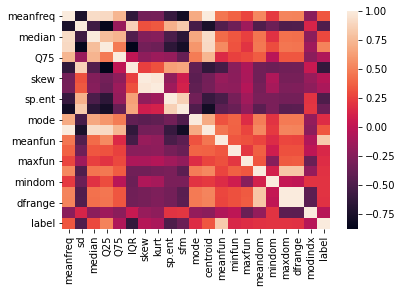

In [34]:
#Mapa de calor da correlacao dos dados
import seaborn as sns 
sns.heatmap(dataset.corr())

## Atributos escolhidos
* Colunas 'Q25' e 'meanfun'  

In [35]:
X = dataset.loc[:,['Q25','meanfun']].values

y = dataset['label'].values

print(X[0:6,:])
print(y[:6])

[[0.01507149 0.08427911]
 [0.01941387 0.10793655]
 [0.00870106 0.09870626]
 [0.09658173 0.08896485]
 [0.07872022 0.10639784]
 [0.06795799 0.11013192]]
[0 0 0 0 0 0]


## Divisão dos conjuntos de dados
* Em dois conjuntos: treinamento e teste

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

## Normalização 
* A amplitude de variação dos dados nos atributos idade e salário são bem diferentes
* Permite que a faixa de variação seja equilibrada entre os diferentes atributos 
* Muitos algoritmos de aprendizado de máquinas são sensíveis a atribuitos com aplitude de valores muito distintos 
* Vídeo com explicações: https://youtu.be/kIeXOC-Rnb4 


In [37]:
# Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Treinamento 
* Com a SVM com kernel linear

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Avaliação do Modelo 
* Uso da métrica de acurácia 
* Matriz de Confusão 

Sugestão de leitura:
* [Métricas de Avaliação: acurácia, precisão, recall… quais as diferenças?](https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c) 

In [39]:
y_pred = classifier.predict(X_test)

print(y_test[0:35])
print(y_pred[0:35])

[1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1]
[1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]


In [40]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred)*100, "%"  )


Acurácia:  95.70707070707071 %


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Matrix de confusão: ")
print(cm)


Matrix de confusão: 
[[385  15]
 [ 19 373]]


## Visualização dos resultados

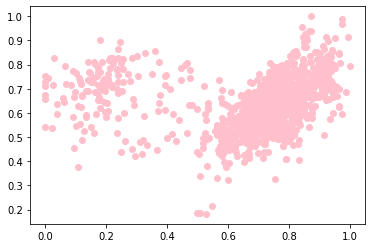

In [42]:
import matplotlib.pyplot as plt

# Seleção dos elementos classificados como female
Q25_female = X_train[y_train == 1, 0]
meanfun_female = X_train[y_train == 1, 1]

plt.scatter(Q25_female,meanfun_female,color='pink')

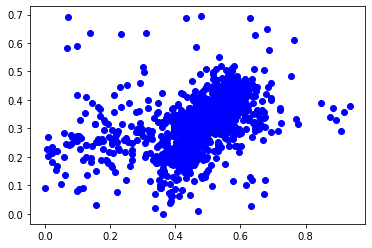

In [43]:
# Seleção dos elementos classificados como male
Q25_male = X_train[y_train == 0, 0]
meanfun_male = X_train[y_train == 0, 1]
plt.scatter(Q25_male,meanfun_male,color='blue')


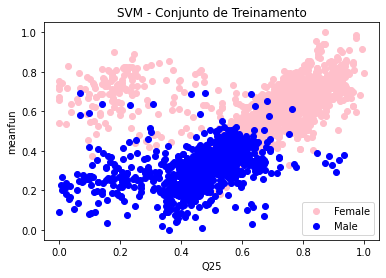

In [44]:
plt.scatter(Q25_female,meanfun_female, color='pink', label = 'Female')
plt.scatter(Q25_male,meanfun_male, color='blue', label = 'Male')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Q25')
plt.ylabel('meanfun')
plt.legend()
plt.show()

In [45]:
import numpy as np

# variação no eixo x para o plot 
vx = np.arange(start = -0.1, stop = 1.1, step = 0.1) 
vy = np.arange(start = -0.1, stop = 1.1, step = 0.1)

X1, X2 = np.meshgrid(vx,vy) 

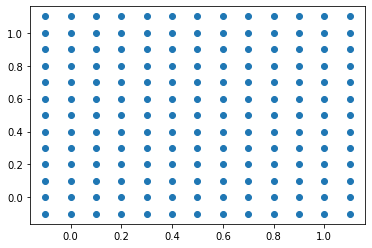

In [46]:
plt.scatter(X1.ravel(), X2.ravel()) 

In [47]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy) 

In [48]:
X1.shape

(49, 49)

In [49]:
y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

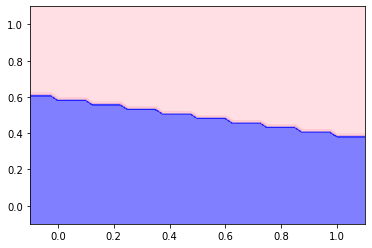

In [50]:
from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('blue','pink')))



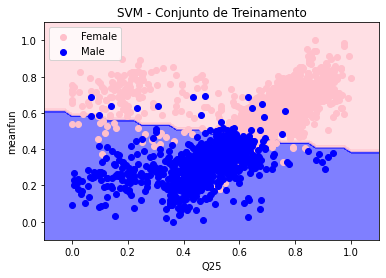

In [51]:
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('blue','pink')))

plt.scatter(Q25_female,meanfun_female, color='pink', label = 'Female')
plt.scatter(Q25_male,meanfun_male, color='blue', label = 'Male')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Q25')
plt.ylabel('meanfun')
plt.legend()
plt.show()

## SVM Não Linear 
* Treinamento com a SVM com Kernel RBF 

In [52]:
classifierRBF = SVC(kernel="rbf",C=700) 

classifierRBF.fit(X_train, y_train) 

SVC(C=700, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
# predição 
y_pred = classifierRBF.predict(X_test)

In [54]:
print("Acurácia: ", accuracy_score(y_test,y_pred)*100, "%"  )

Acurácia:  97.72727272727273 %


In [55]:
# matrix de confusão 
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[389  11]
 [  7 385]]


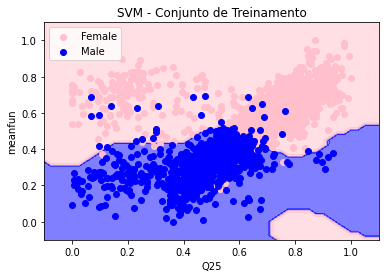

In [56]:
# Nova "superfície de previsão"

y_pred_mesh =  classifierRBF.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('blue','pink')))

plt.scatter(Q25_female,meanfun_female, color='pink', label = 'Female')
plt.scatter(Q25_male,meanfun_male, color='blue', label = 'Male')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('Q25')
plt.ylabel('meanfun')
plt.legend()
plt.show()

## **Análise**
Usando um SVM linear obtemos uma precisão de aproximadamente 95,7%, enquanto com o SVM não linear obtemos uma precisão de 97,7%. Com isso podemos ver que o SVM não linear teve uma melhor eficiência já que se observarmos a distribuição dos dados podemos ver que a aproximação por uma linha reta dada pela versão linear não separou os dados de forma mais eficiente, com isso vemos que o ajuste por uma curva satisfaz mais o problema em questão e com isso obteve um melhor resultado.